# **Topic: Enhancing Email Security through Phishing Detection**

***Abstract:***



Phishing attacks remain one of the most prevalent and effective methods used by cybercriminals to steal information and attack personal and organizational security. These attacks involve the use of deceptive emails that mimic legitimate communications, aiming to trick recipients into leaking sensitive information or downloading malware.


Despite ongoing efforts to combat phishing, these attacks are still continuously rising, it is necessary to develop more advanced detection and prevention strategies. This project aims to address the problem of phishing emails by developing a machine learning-based detection system that can accurately identify and flag phishing attempts, thereby enhancing email security for individuals and organizations.


Dataset: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

PPT link:https://www.canva.com/design/DAGBJhttPV8/_gZ-CDyxO_snFlikRVIp7Q/edit?utm_content=DAGBJhttPV8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton


Retrieving Email dataset and basic properpties

Downloading...
From: https://drive.google.com/uc?id=1cDu_SA7bnEje0UWtUQiD4JsUOG2ttx6S
To: /content/emails.csv
100% 31.2M/31.2M [00:00<00:00, 117MB/s]
Constant Features: []


<ipython-input-5-fc0ad5a99f41>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=constant_features, axis=1, inplace=True)
<ipython-input-5-fc0ad5a99f41>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Key Features x_train: (3936, 931) Key Features x_test: (695, 931)
Key Features x_train: (3936, 931) Key Features x_test: (695, 931)
74
Total number of emails: 5172
Number of features: 2999
Number of phishing emails: 1500
Number of normal emails: 3672


<ipython-input-5-fc0ad5a99f41>:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_keyFea_train.drop(labels=correlated_features, axis=1, inplace=True)
<ipython-input-5-fc0ad5a99f41>:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_keyFea_test.drop(labels=correlated_features, axis=1, inplace=True)


Top 20 features: Index(['enron', 'http', 'hpl', 'thanks', 'daren', 'subject', 'hanks', 'nom',
       'ali', 'gas', 'your', 'thank', 'attached', 'hp', 'th', 'money', 'aren',
       'ii', 'for', 'our'],
      dtype='object')


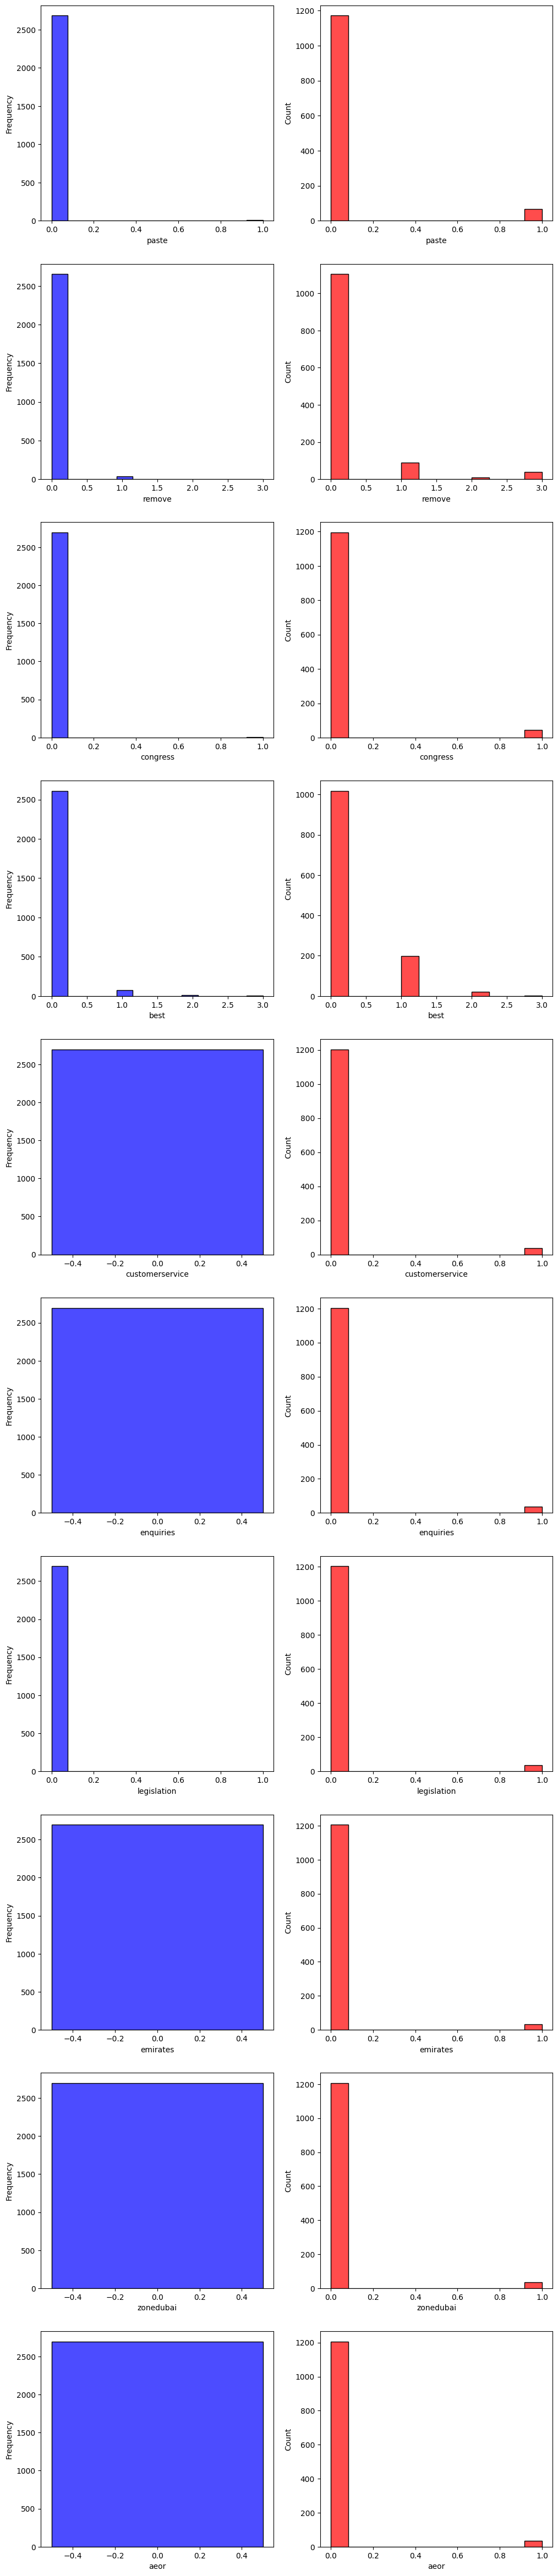

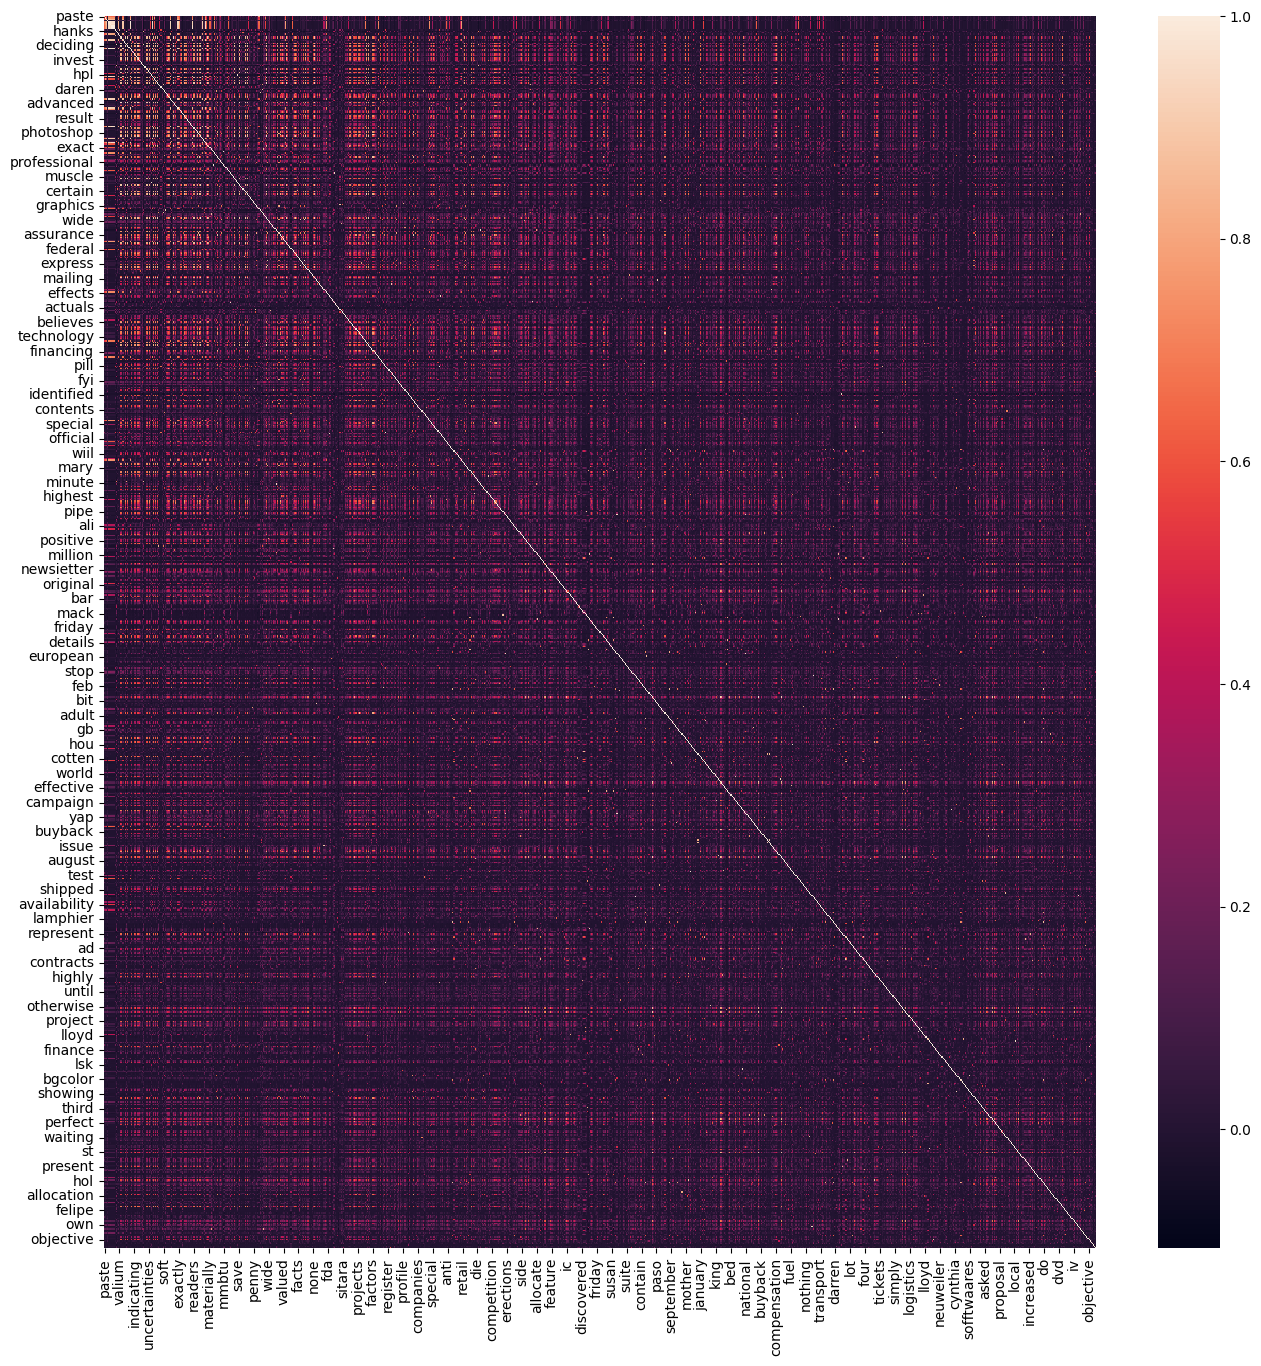

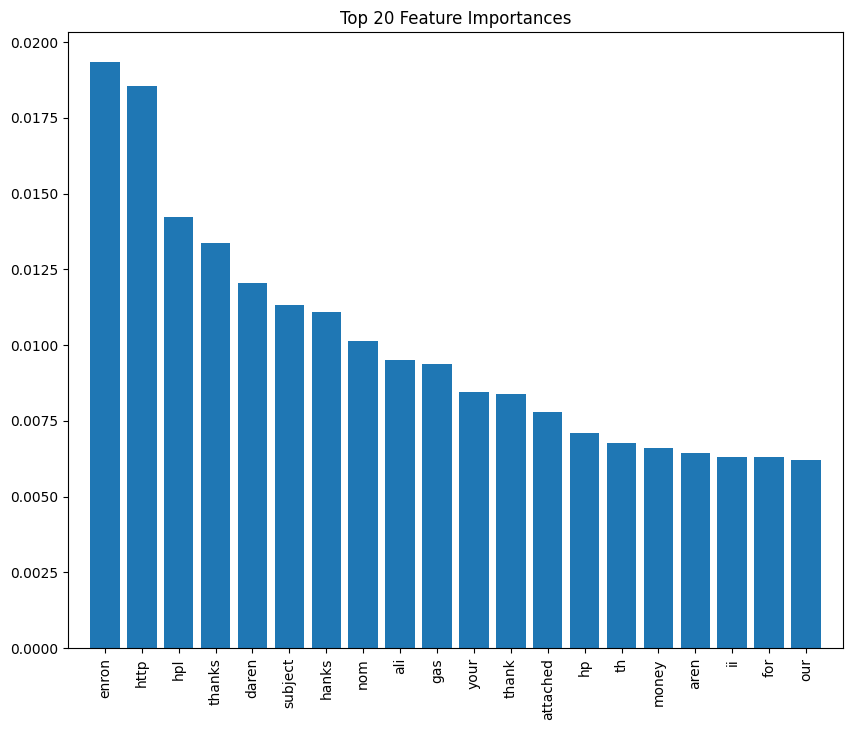

In [ ]:
import numpy as np
import tensorflow
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#get file

!gdown  '1cDu_SA7bnEje0UWtUQiD4JsUOG2ttx6S' --output 'emails.csv'





# Whole first row except first and last column as name
names = pd.read_csv('emails.csv', nrows=0).columns[1:]




dataset = pd.read_csv('emails.csv', usecols=names)
# Exclude the first column
dataset = dataset.iloc[:, 1:]






df=dataset.iloc[:, 1:]

df.describe()

df.dtypes.value_counts()
df.dtypes[df.dtypes == 'object']

constant_features = [
    features for features in df.columns if df[features].std() == 0
]
print("Constant Features:",constant_features)
df.drop(labels=constant_features, axis=1, inplace=True)


df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

[col for col in df.columns if df[col].isnull().sum() > 0]

y=df.loc[:,"Prediction"]
x=df.drop("Prediction",axis=1)

from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)



from sklearn.feature_selection import chi2

f_score = chi2(MinMaxScaler().fit_transform(x_train), y_train)
f_score
pvalues = pd.Series(f_score[1])
pvalues.index = x_train.columns
sortedFeature=pvalues.sort_values(ascending = True)
sortedFeature

count=0
for i in sortedFeature.values:
    if i <=0.01:
        count+=1
keyFeatures=sortedFeature.index[:count+1] #get features name until
keyFeatureColumns=keyFeatures.values
len(keyFeatureColumns)

x_keyFea_train=x_train[keyFeatureColumns]
x_keyFea_test=x_test[keyFeatureColumns]

print("Key Features x_train:",x_keyFea_train.shape,"Key Features x_test:",x_keyFea_test.shape)

from matplotlib import pyplot as plt

analysis_cols=[x_keyFea_train.columns[i] for i in range(len(x_keyFea_train.columns)) if i<10]


fig, axes=plt.subplots(nrows=len(analysis_cols),ncols=2,figsize=(12,60))
for index,col in enumerate(analysis_cols):
    sns.histplot(x_keyFea_train[y_train==0][col],color="blue",alpha=0.7,ax=axes[index,0])
    sns.histplot(x_keyFea_train[y_train==1][col],color="red",alpha=0.7,ax=axes[index,1])
    axes[index,0].set_xlabel(str(col))
    axes[index,0].set_ylabel("Frequency")


corrmat = x_keyFea_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)

grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

print("Key Features x_train:",x_keyFea_train.shape,"Key Features x_test:",x_keyFea_test.shape)
corr_features = correlation(x_keyFea_train, 0.9) # filter for all the features with correlation more than 0.9
correlated_features = set(corr_features) # Set statement is used to identify the unique feature in the list
print(len(correlated_features)) # length of set of correlated features
x_keyFea_train.drop(labels=correlated_features, axis=1, inplace=True)
x_keyFea_test.drop(labels=correlated_features, axis=1, inplace=True)

x_keyFea_train.shape, x_keyFea_test.shape

key_fea_num=x_keyFea_train.shape[1]
key_fea_num






# The first column is an ID or non-feature column and the last column is the label
x = dataset.iloc[:, :-1].values  # Selects all columns except the last one
y = dataset.iloc[:, -1].values  # The last column is the label

# Split the dataset into training and testing sets




# Scale the features
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

import matplotlib.pyplot as plt
import seaborn as sns

# Dataset size
print(f"Total number of emails: {dataset.shape[0]}")
print(f"Number of features: {dataset.shape[1] - 1}")  # Assuming the last column is the label

#the label for phishing emails is 1 and for normal emails is 0
phishing_emails = dataset[dataset.iloc[:, -1] == 1]
normal_emails = dataset[dataset.iloc[:, -1] == 0]

print(f"Number of phishing emails: {phishing_emails.shape[0]}")
print(f"Number of normal emails: {normal_emails.shape[0]}")



from sklearn.decomposition import PCA
import numpy as np

# Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(dataset.iloc[:, :-1])  # Exclude the label column

from sklearn.ensemble import RandomForestClassifier


randomforest = RandomForestClassifier()
randomforest.fit(MinMaxScaler().fit_transform(x),y )  #the last column is the label

# get feature importances and sort them
importances = randomforest.feature_importances_
indices = np.argsort(importances)[::-1]

# select the top 20 features
N = 20
top_n_indices = indices[:N]
top_n_features = dataset.columns[top_n_indices]

print(f"Top {N} features:", top_n_features)

#  plot only the top 20 features for a more focused analysis
plt.figure(figsize=(10, 8))
plt.title(f'Top {N} Feature Importances')
plt.bar(range(N), importances[top_n_indices], align='center')
plt.xticks(range(N), top_n_features, rotation=90)
plt.xlim([-1, N])
plt.show()



**Statistical analysis of top 50 Features with Mutual information scores**

(Density consider as extra information)

Top 50 features by mutual information: Index(['enron', 'hpl', 'daren', 'forwarded', 'hanks', 'http', 'aren', 'thanks',
       'subject', 'attached', 'ali', 'your', 'thank', 'our', 'hp', 'meter',
       'farmer', 'gas', 'soft', 'offer', 'ur', 'btu', 'deal', 'questions',
       'off', 'ii', 'sec', 'gra', 'forward', 'volume', 'money', 'dr', 'ward',
       'mo', 'l', 's', 'xls', 'top', 'cia', 'thousand', 'more', 'nom', 'i',
       'mmbtu', 'drug', 'f', 'press', 'for', 'sitara', 'tm'],
      dtype='object')


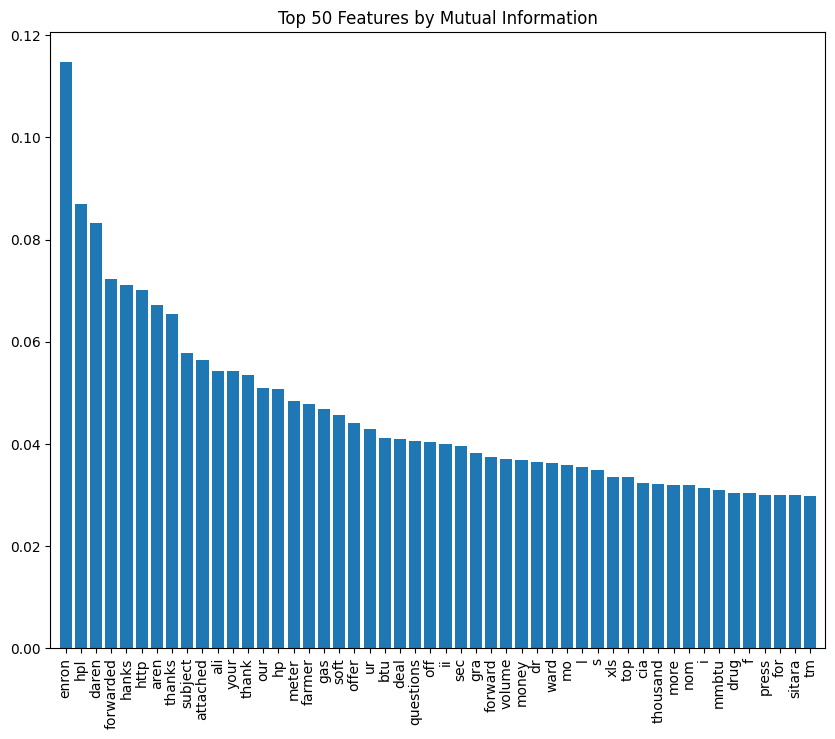

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


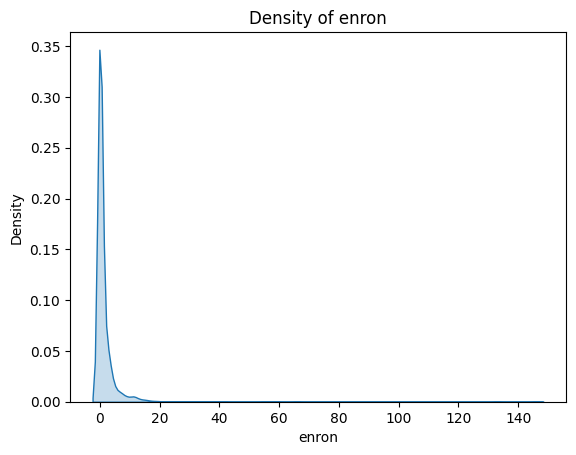

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


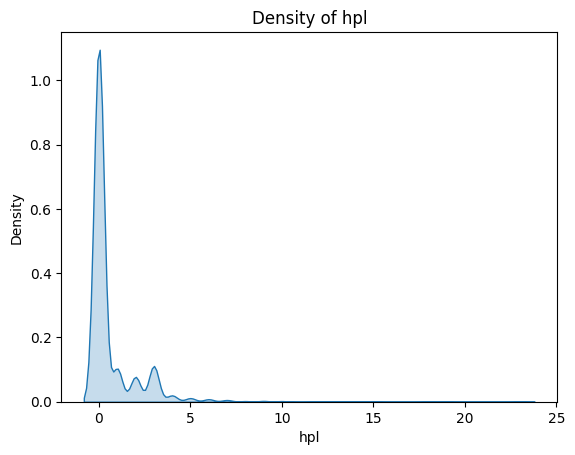

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


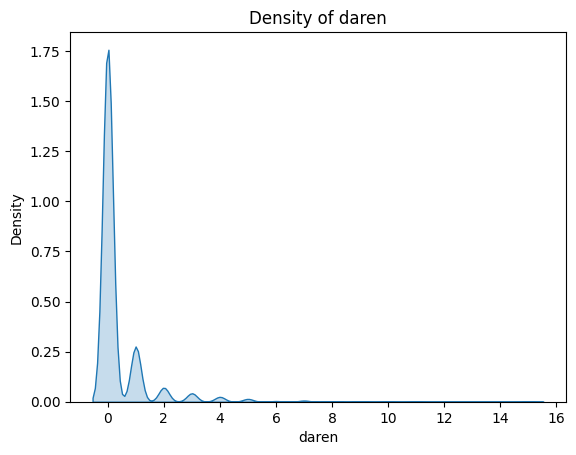

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


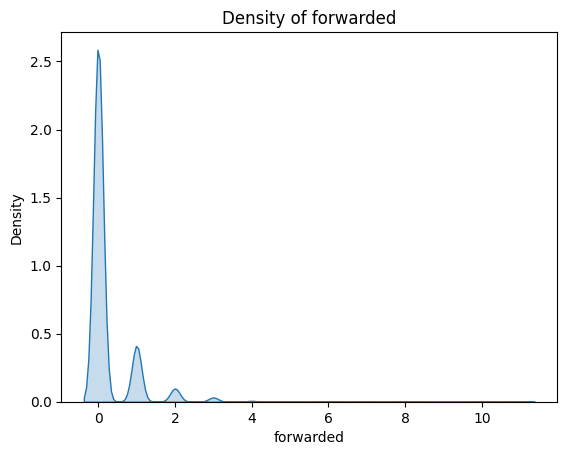

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


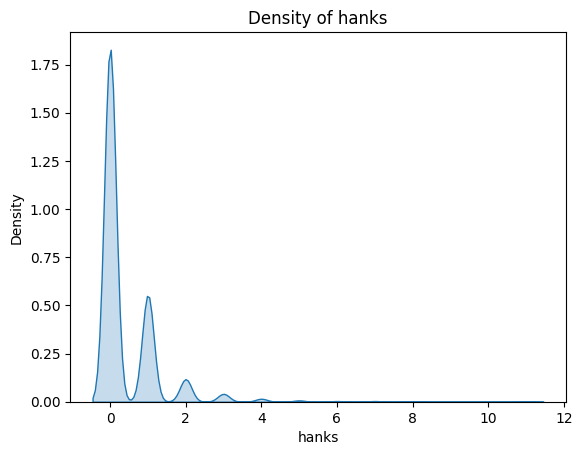

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


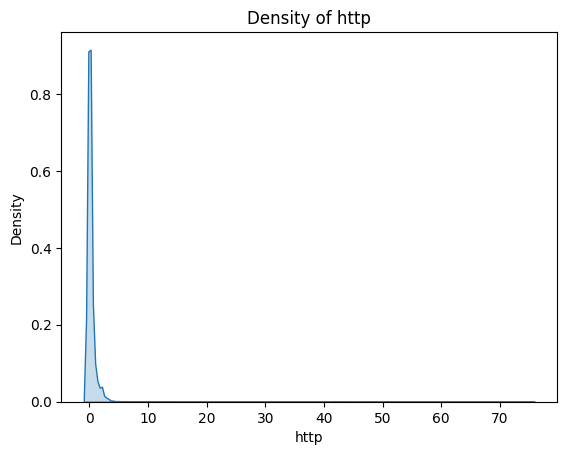

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


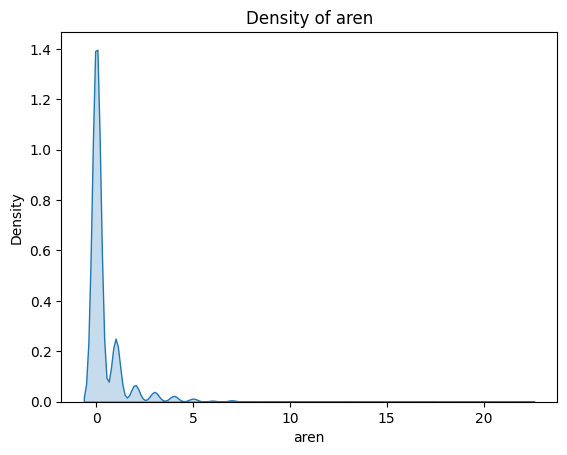

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


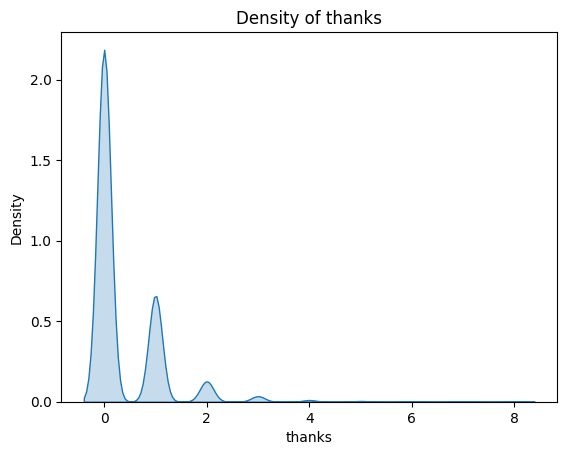

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


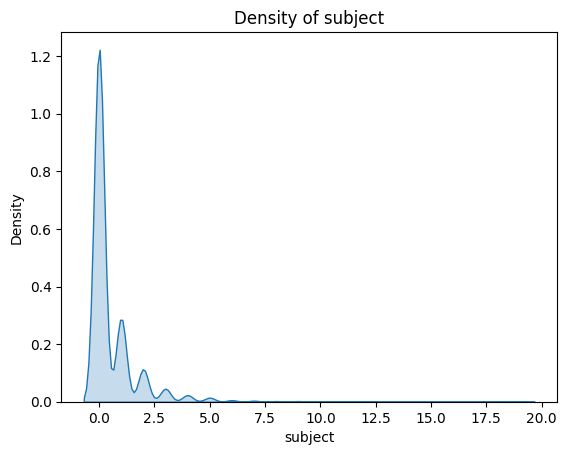

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


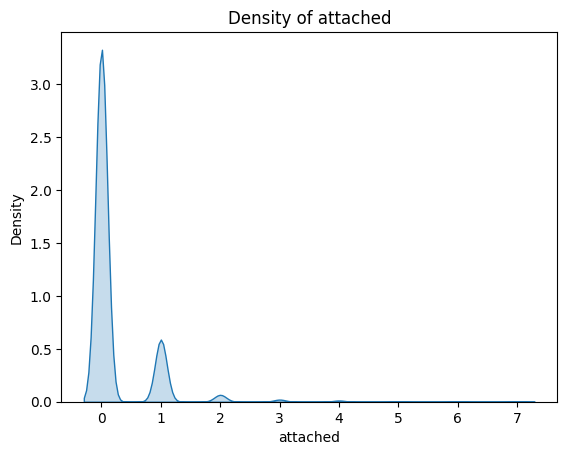

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


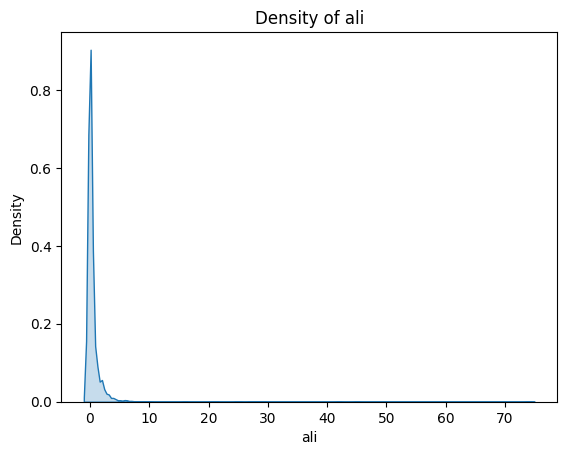

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


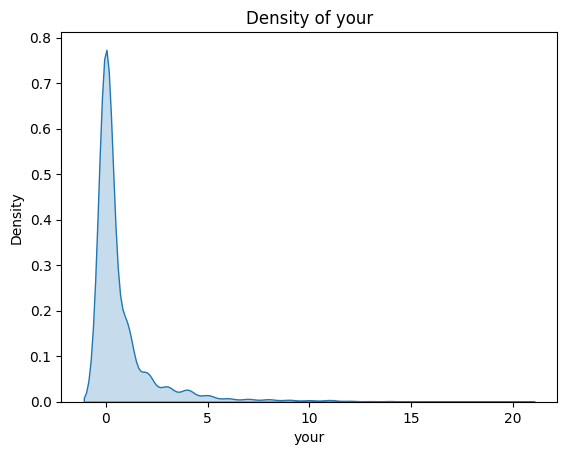

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


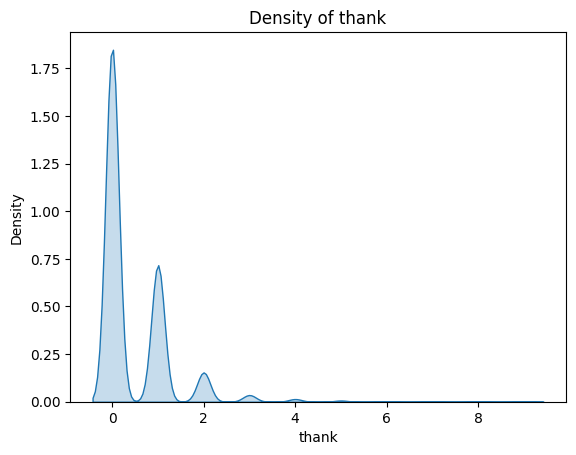

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


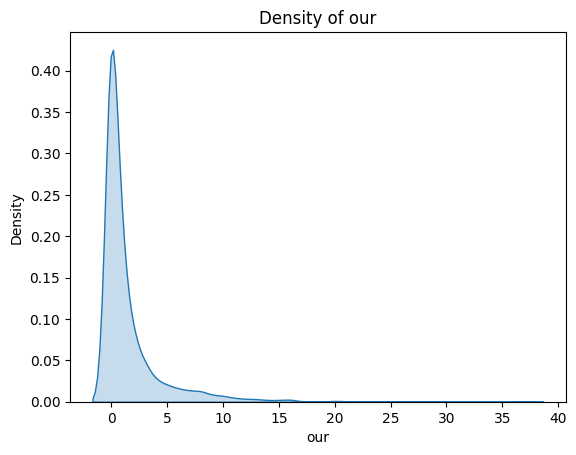

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


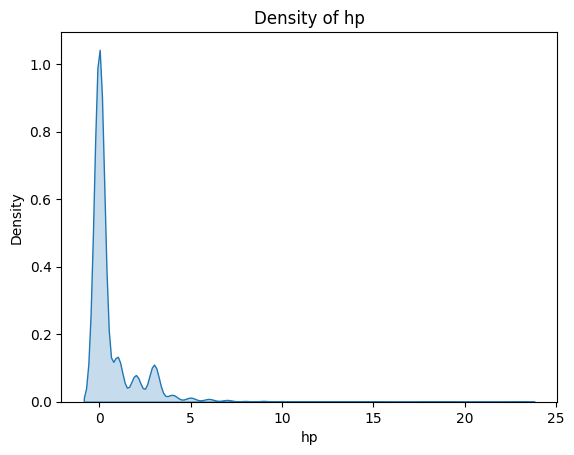

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


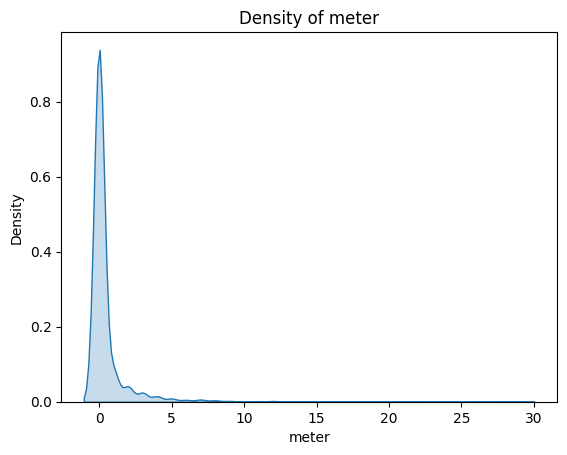

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


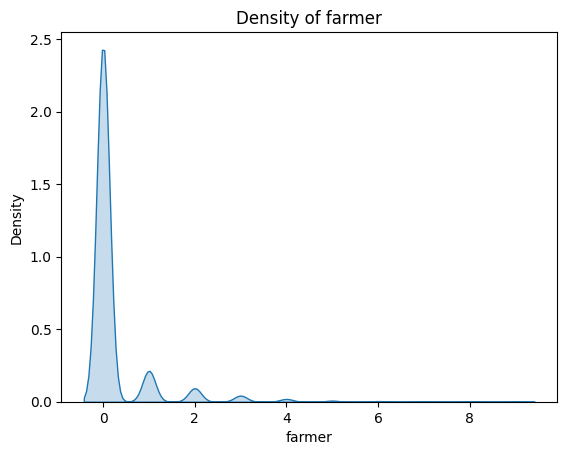

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


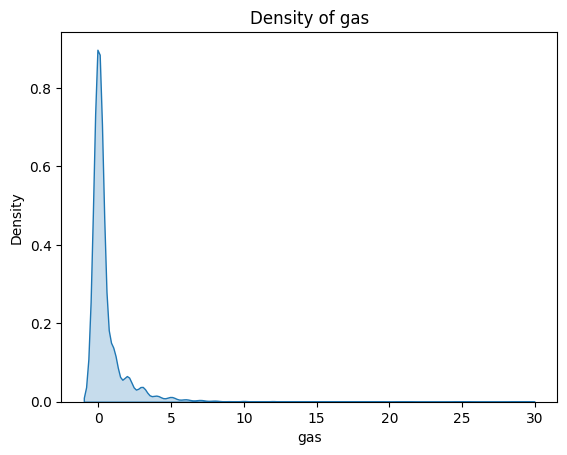

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


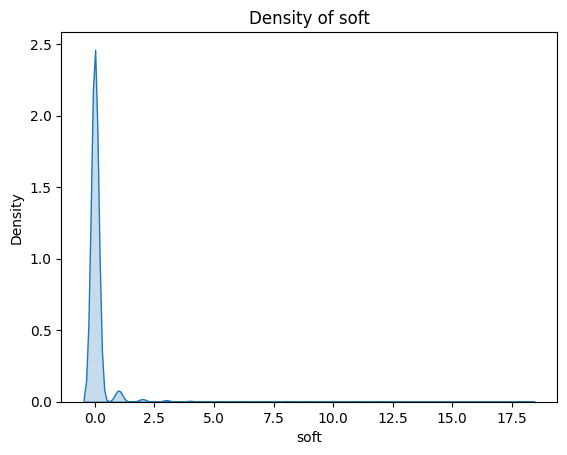

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


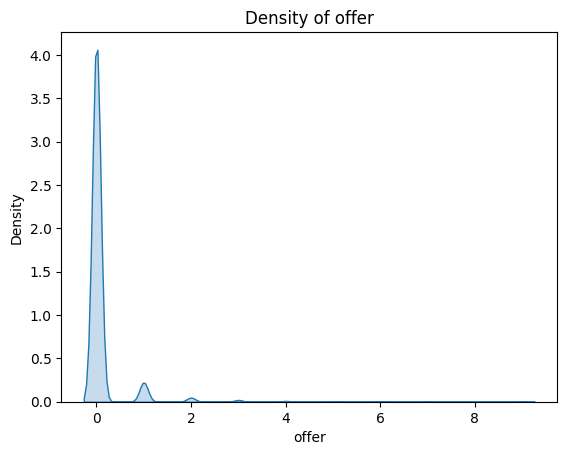

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


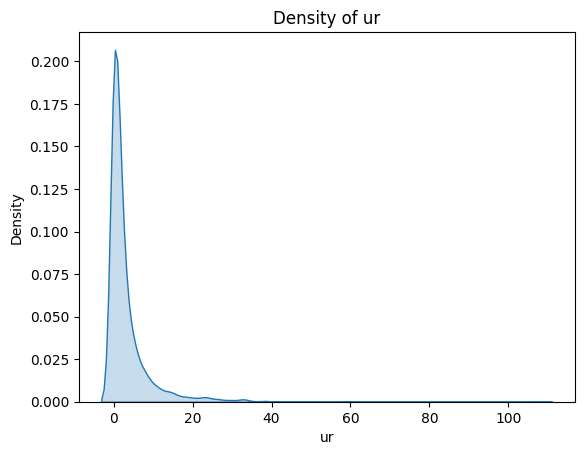

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


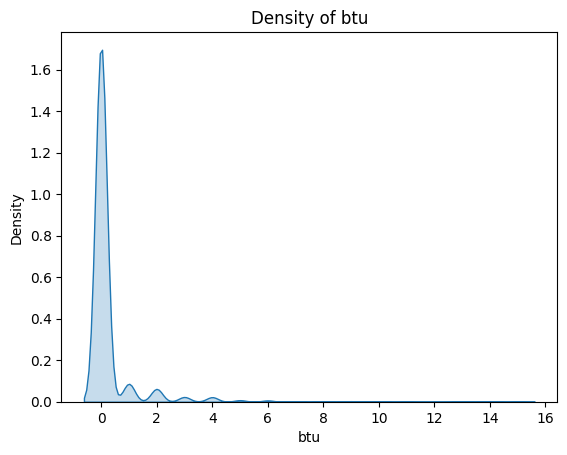

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


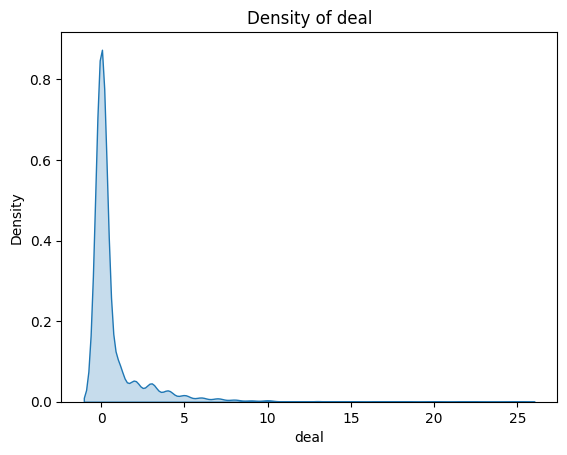

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


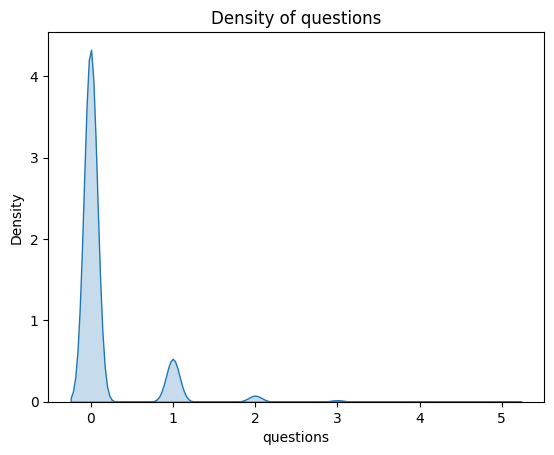

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


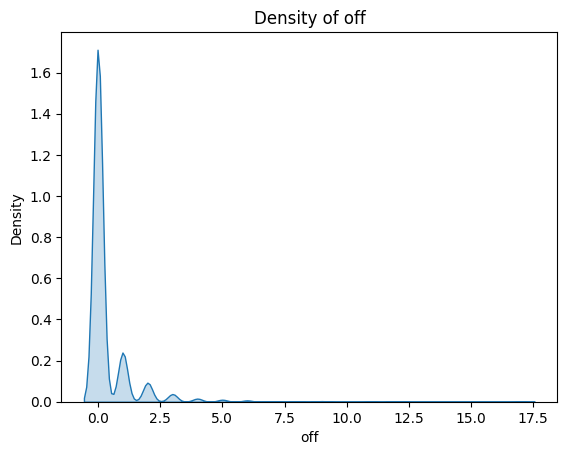

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


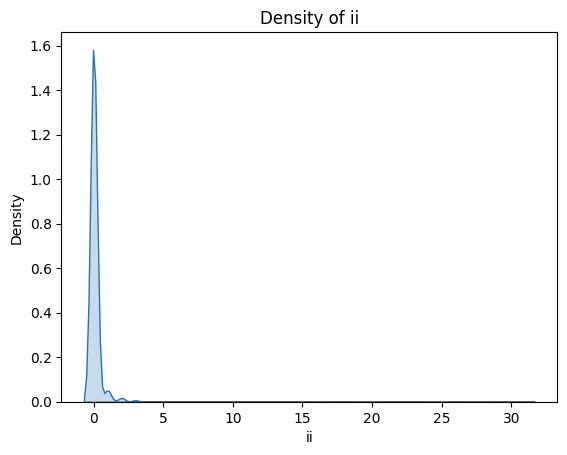

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


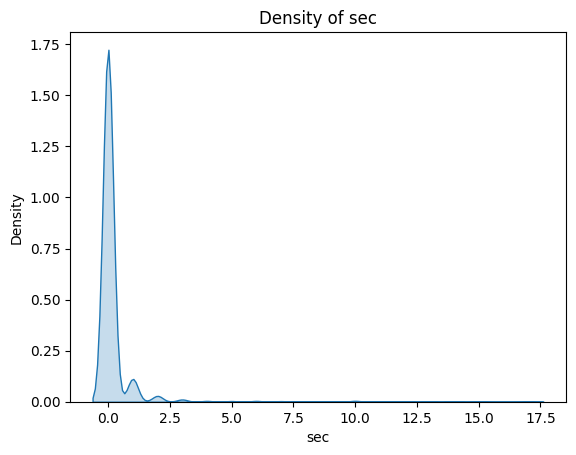

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


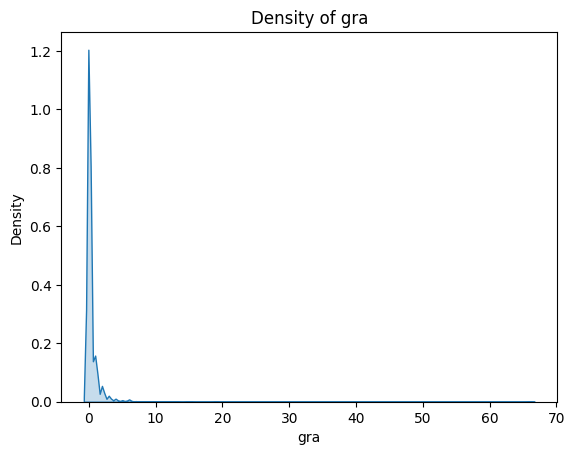

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


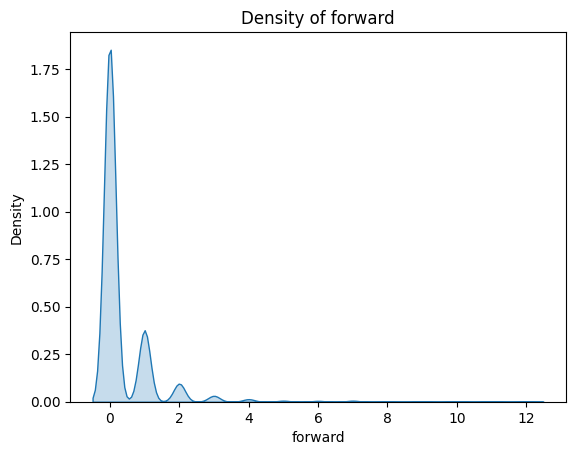

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


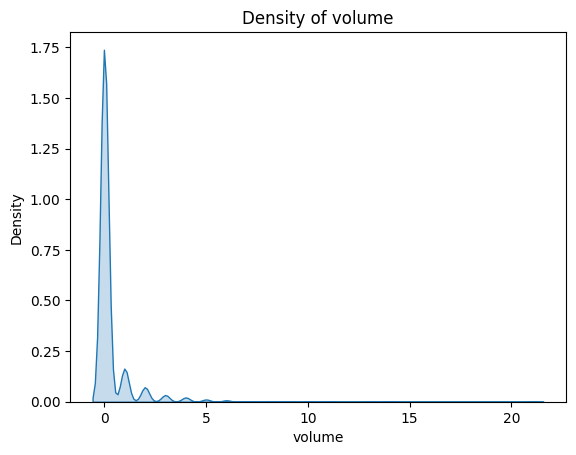

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


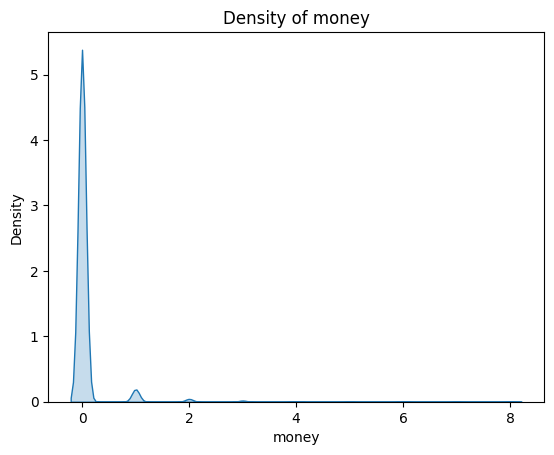

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


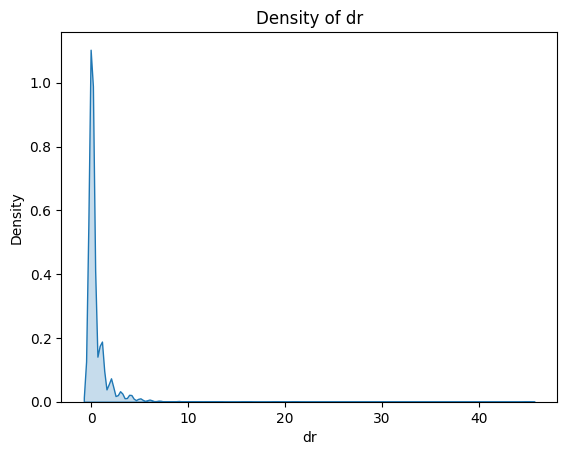

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


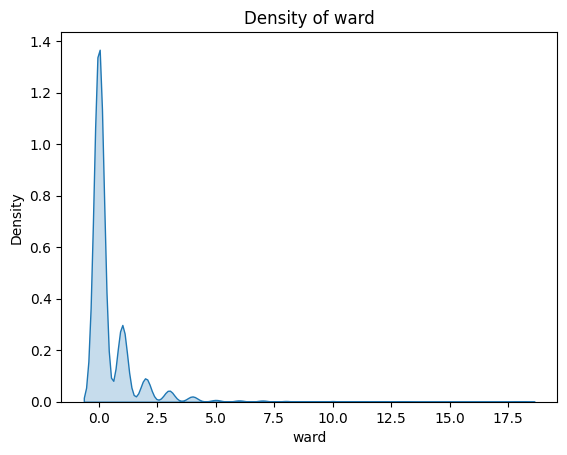

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


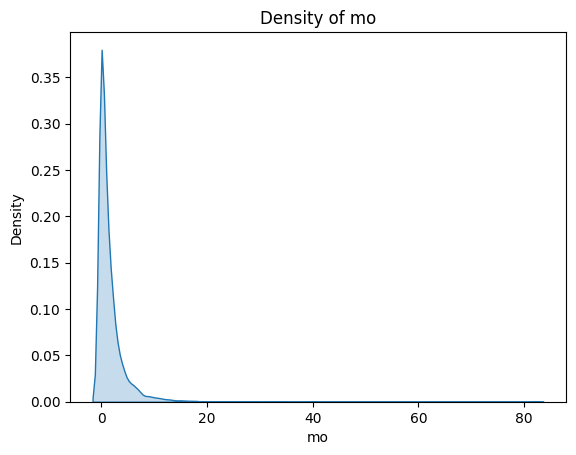

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


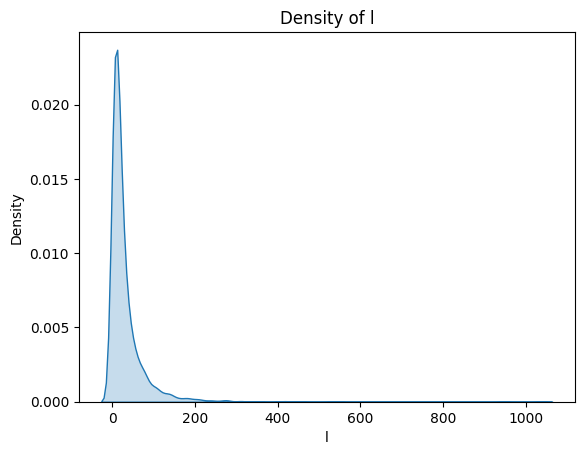

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


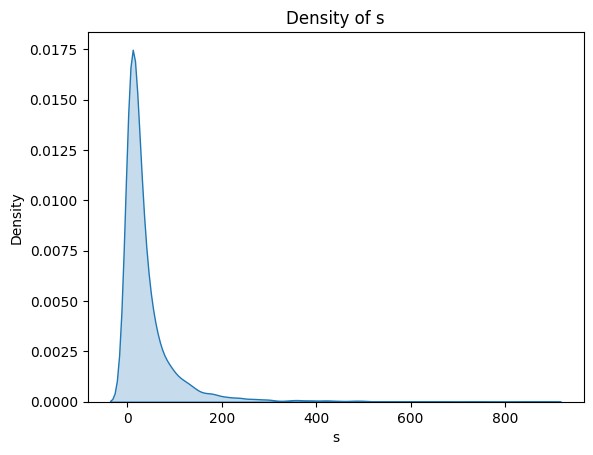

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


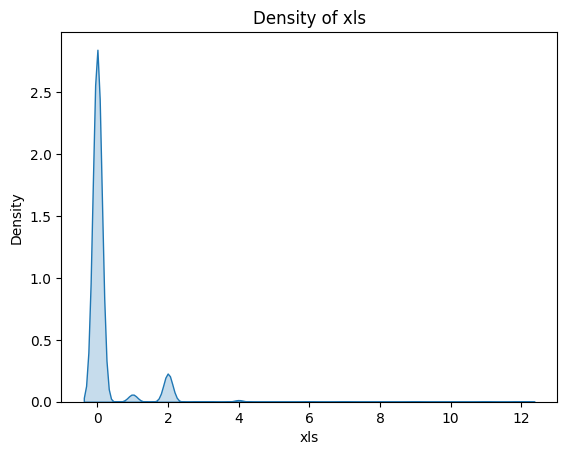

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


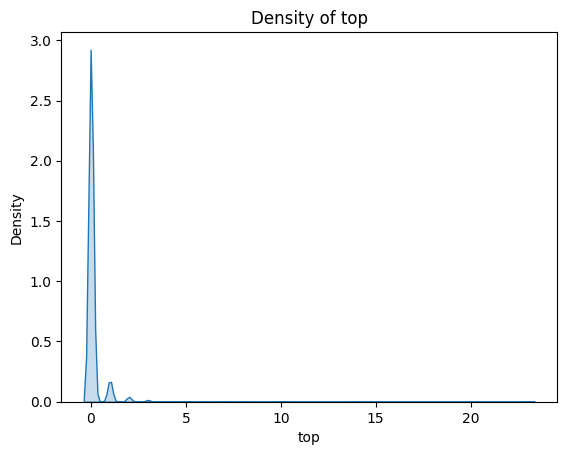

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


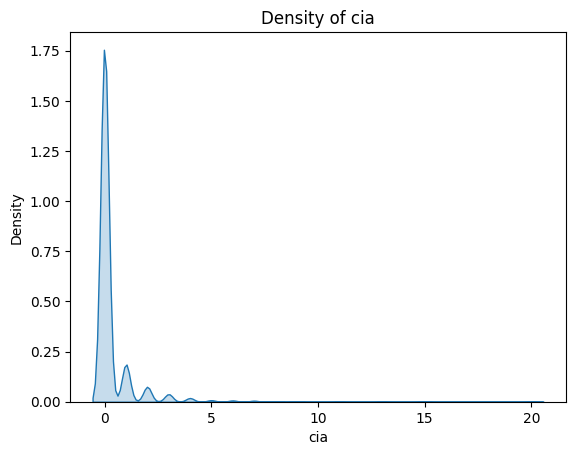

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


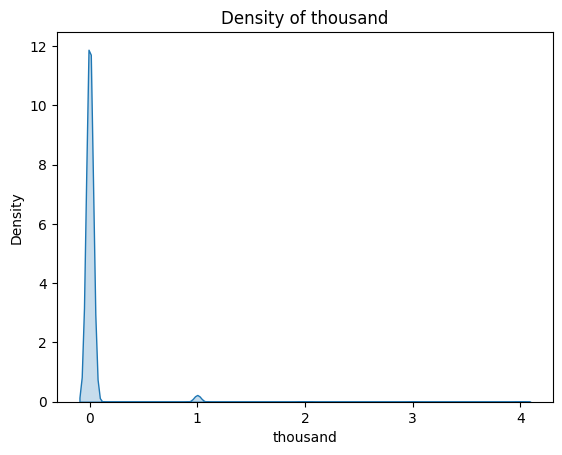

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


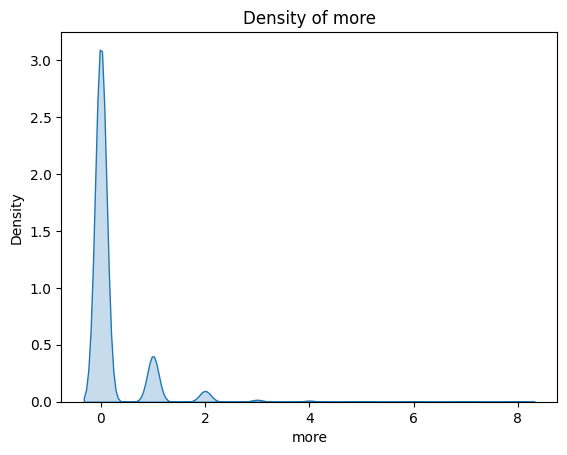

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


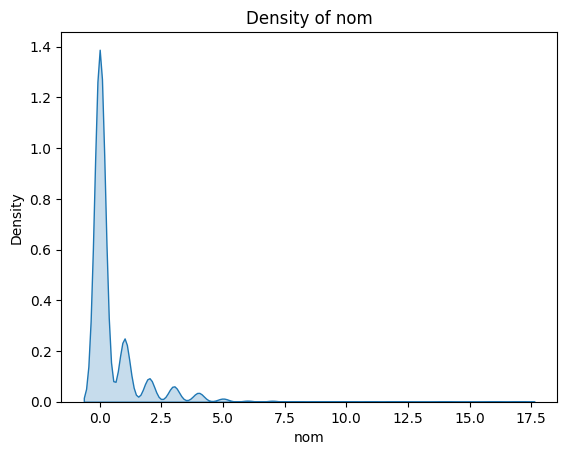

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


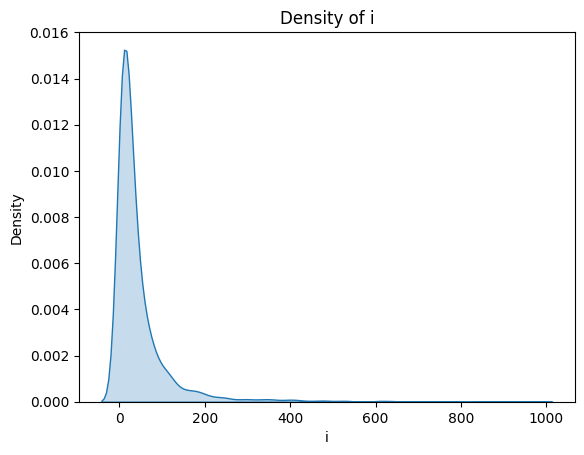

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


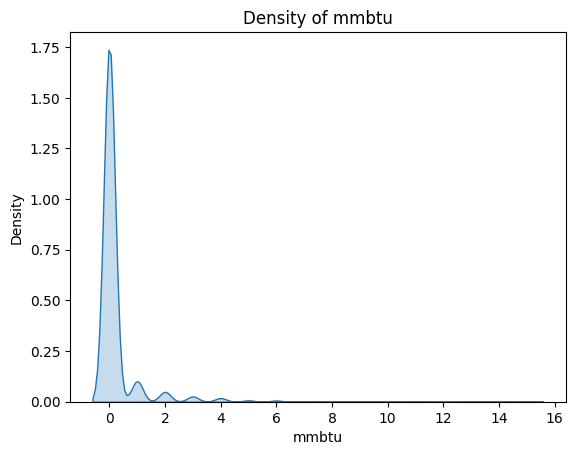

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


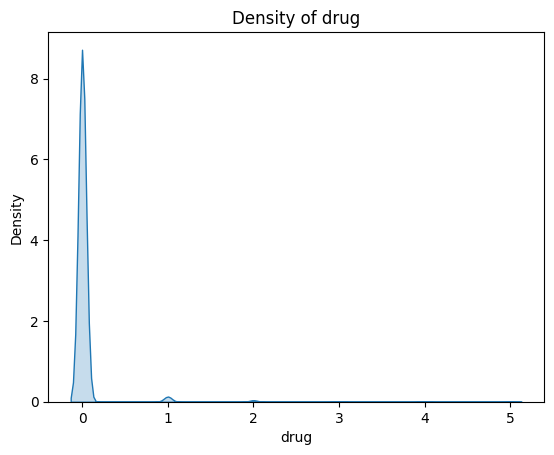

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


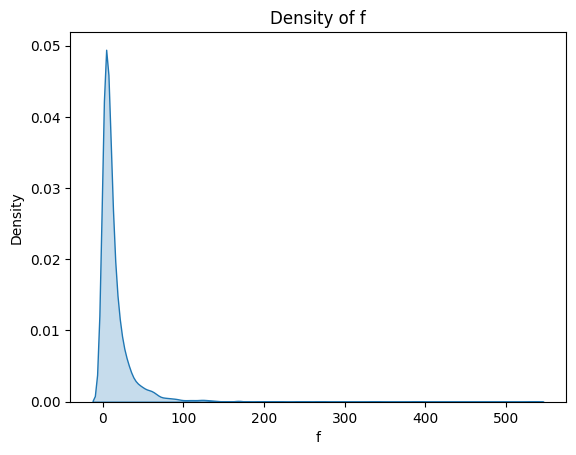

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


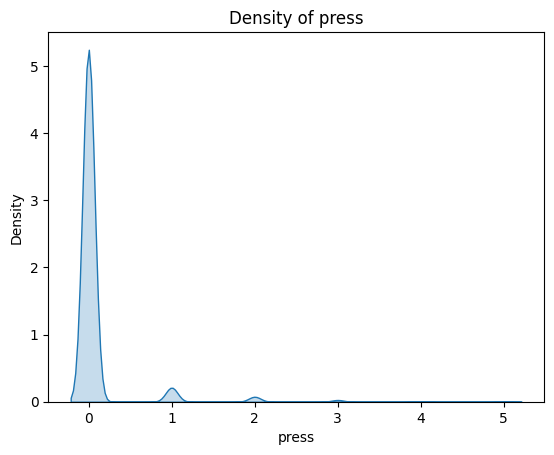

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


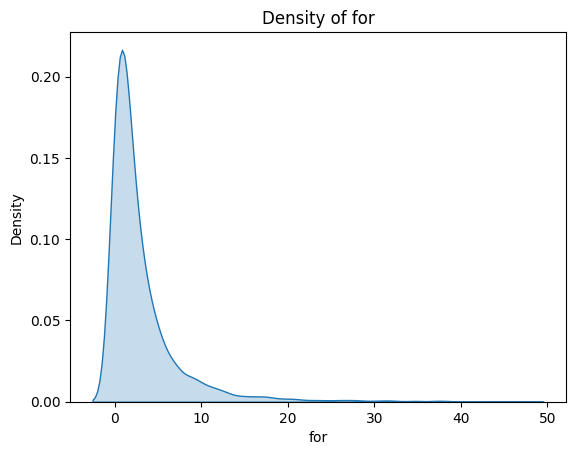

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


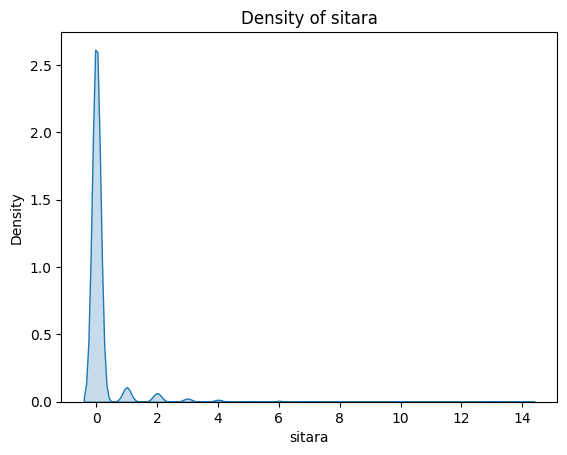

<ipython-input-6-9176f09bf937>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=feature, shade=True)


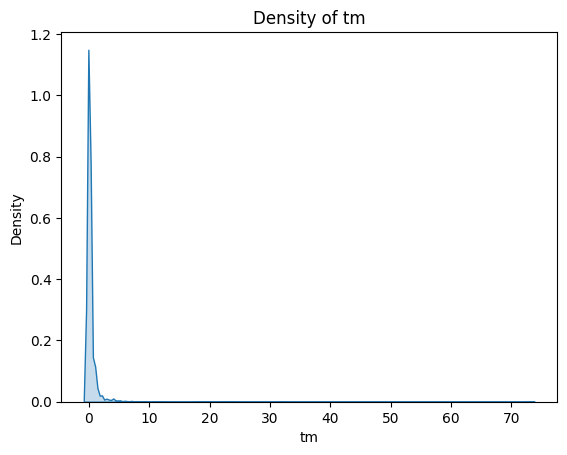

Mi x_train: (3936, 50) Mi x_test: (695, 50)


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# compute mutual information between each feature and the target
mi_scores = mutual_info_classif(MinMaxScaler().fit_transform(x), y)

# rank features by their mutual information scores
mi_indices = np.argsort(mi_scores)[::-1]


N = 50
top_n_mi_indices = mi_indices[:N]
top_n_mi_features = dataset.columns[top_n_mi_indices]

print(f"Top {N} features by mutual information:", top_n_mi_features)

#  plot the mutual information scores
plt.figure(figsize=(10, 8))
plt.title(f'Top {N} Features by Mutual Information')
plt.bar(range(N), mi_scores[top_n_mi_indices], align='center')
plt.xticks(range(N), top_n_mi_features, rotation=90)
plt.xlim([-1, N])
plt.show()


#  Density of top Features
"""for feature in top_n_mi_features:
    sns.kdeplot(data=dataset, x=feature, shade=True)
    plt.title(f'Density of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()"""

x_miFea_train=x_train[top_n_mi_features]
x_miFea_test=x_test[top_n_mi_features]

print("Mi x_train:",x_miFea_train.shape, "Mi x_test:",x_miFea_test.shape)


Shape 1: (3936, 2998) Shape 2: (695, 2998)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                59980     
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 60022 (234.46 KB)
Trainable params: 60022 (234.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
105/105 [==============================] - 1s 5ms/step - loss: 0.5670 - accuracy: 0.7339 - val_loss: 0.4077 - val_accuracy: 0.8426
Epoch 2/50
105/105 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.84

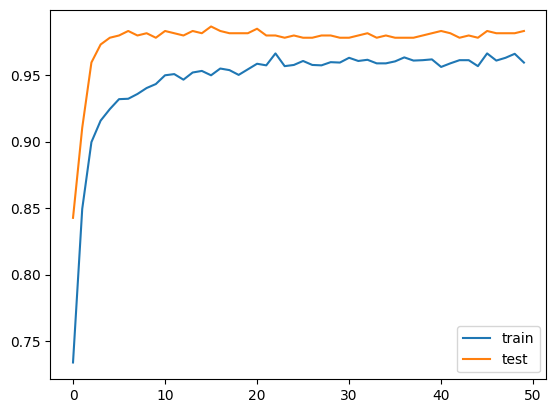

22/22 [==============================] - 0s 2ms/step
Accuracy score: 0.98
Precision score: 0.97
Recall score: 0.97
F1 score: 0.97
Model accuracy: 0.9712230215827338
Precision: 0.971830985915493
Recall: 0.9366515837104072
F1 Score: 0.9539170506912442
Cross-Validation Accuracy Scores: [0.96700508 0.96442186 0.95298602 0.96696315 0.96442186]
Mean CV Accuracy: 0.9631595921026322
Precision: 0.9931972789115646
Recall: 0.6606334841628959
Model accuracy: 0.8906474820143885
Cross-Validation Accuracy Scores: [0.93401015 0.95679797 0.92503177 0.93011436 0.94027954]
Mean CV Accuracy: 0.9372467572675263
Model accuracy: 0.9553956834532374
Precision: 0.9318181818181818
Recall: 0.9276018099547512
F1 Score: 0.929705215419501
Cross-Validation Accuracy Scores: [0.91497462 0.93773825 0.91359593 0.9364676  0.91105464]
Mean CV Accuracy: 0.9227662072123788
Model accuracy: 0.9669064748201439
Precision: 0.9669811320754716
Recall: 0.9276018099547512
F1 Score: 0.9468822170900693
Cross-Validation Accuracy Scores:

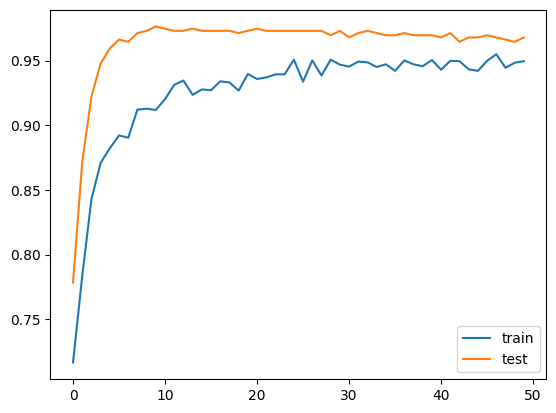

22/22 [==============================] - 0s 1ms/step
Accuracy score: 0.97
Precision score: 0.94
Recall score: 0.96
F1 score: 0.95
Model accuracy: 0.9525179856115108
Precision: 0.9607843137254902
Recall: 0.8868778280542986
F1 Score: 0.9223529411764705
Cross-Validation Accuracy Scores: [0.95050761 0.95171537 0.92757306 0.94409149 0.94282084]
Mean CV Accuracy: 0.9433416753204031
Precision: 0.871244635193133
Recall: 0.918552036199095
Model accuracy: 0.9309352517985612
Cross-Validation Accuracy Scores: [0.94796954 0.95171537 0.93265565 0.94790343 0.93773825]
Mean CV Accuracy: 0.9435964499255025
Model accuracy: 0.9496402877697842
Precision: 0.9386792452830188
Recall: 0.9004524886877828
F1 Score: 0.9191685912240185
Cross-Validation Accuracy Scores: [0.91624365 0.91613723 0.89961881 0.91740788 0.9047014 ]
Mean CV Accuracy: 0.9108217932262205
Model accuracy: 0.9712230215827338
Precision: 0.9674418604651163
Recall: 0.9411764705882353
F1 Score: 0.9541284403669725
Cross-Validation Accuracy Scores:

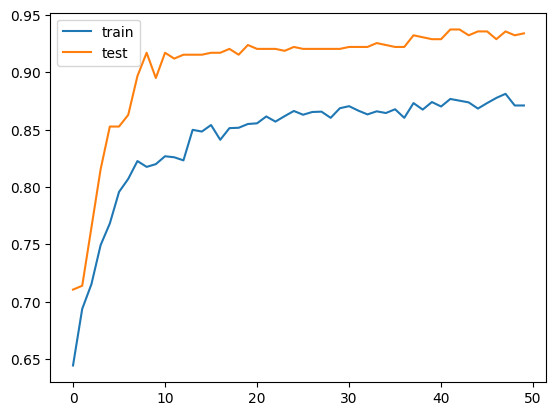

22/22 [==============================] - 0s 1ms/step
Accuracy score: 0.94
Precision score: 0.87
Recall score: 0.95
F1 score: 0.91
Model accuracy: 0.897841726618705
Precision: 0.875
Recall: 0.7918552036199095
F1 Score: 0.8313539192399051
Cross-Validation Accuracy Scores: [0.8819797  0.88691233 0.89453621 0.89580686 0.86658196]
Mean CV Accuracy: 0.8851634104967138
Precision: 0.8371040723981901
Recall: 0.8371040723981901
Model accuracy: 0.8964028776978418
Cross-Validation Accuracy Scores: [0.90609137 0.91613723 0.91232529 0.9021601  0.90088945]
Mean CV Accuracy: 0.907520688342933
Model accuracy: 0.8949640287769784
Precision: 0.7569444444444444
Recall: 0.9864253393665159
F1 Score: 0.8565815324165029
Cross-Validation Accuracy Scores: [0.86675127 0.86912325 0.841169   0.84625159 0.86404066]
Mean CV Accuracy: 0.8574671534259123
Model accuracy: 0.9525179856115108
Precision: 0.9272727272727272
Recall: 0.9230769230769231
F1 Score: 0.9251700680272109
Cross-Validation Accuracy Scores: [0.93908629 

In [ ]:
from keras.layers import Dropout
allXForTraining=[(x_train,x_test),(x_keyFea_train,x_keyFea_test),(x_miFea_train,x_miFea_test)]  #no row is dropped
allModelAccResult=[]
for i in range(len(allXForTraining)):
  print("Shape 1:",allXForTraining[i][0].shape,"Shape 2:",allXForTraining[i][1].shape)
  x_Fea_train=MinMaxScaler().fit_transform(allXForTraining[i][0])
  x_Fea_test=MinMaxScaler().fit_transform(allXForTraining[i][1])
  # y_train_NN=to_categorical(y_train)
  x_train_train,x_test_val,y_train_train,y_test_val=train_test_split(x_Fea_train,y_train,test_size=0.15)

  #NN
  model = Sequential()
  model.add(Dense(20, input_dim=x_Fea_train.shape[1], activation='relu'))
  model.add(Dropout(0.8))
  # model.add(Dense(50, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  y_train_train=to_categorical(y_train_train)
  y_test_val=to_categorical(y_test_val)

  history = model.fit(x_train_train ,y_train_train, validation_data=(x_test_val, y_test_val),epochs=50, verbose=1)

  _, train_acc = model.evaluate(x_train_train, y_train_train)
  _, test_acc = model.evaluate(x_test_val, y_test_val)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show()

  prediction=np.argmax(model.predict(x_Fea_test), axis=-1)
  print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
  print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
  print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
  print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))

  allModelAccResult.append(accuracy_score(y_test, prediction))



  #Logistic regression model
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
  from sklearn.preprocessing import StandardScaler
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

  # initialize the logistic model

  logistic_model = LogisticRegression(max_iter=10000)

  # Perform cross-validation
  kfold = StratifiedKFold(n_splits=5)
  log_results = cross_val_score(logistic_model,x_Fea_train, y_train, cv=kfold, scoring='accuracy')

  # Fit the model on the training data
  logistic_model.fit(x_Fea_train, y_train)

  # Predict the labels for the test set
  y_pred = logistic_model.predict(x_Fea_test)

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model accuracy: {accuracy}")
  allModelAccResult.append(accuracy)

  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, y_pred, average='binary')
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")

  print("Cross-Validation Accuracy Scores:", log_results)
  print("Mean CV Accuracy:", log_results.mean())




  #SVM

  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
  from sklearn.preprocessing import StandardScaler
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score


  dataSelectionTrainingArray=[(x_keyFea_train,y_train)]
  dataSelectionTestingArray=[(x_keyFea_test,y_test)]

  # initialize the SVM model
  svm_model = SVC(max_iter=10000)

  # Perform cross-validation
  kfold = StratifiedKFold(n_splits=5)
  svm_results = cross_val_score(svm_model, x_Fea_train, y_train, cv=kfold, scoring='accuracy')

  # fit the model on the training data
  svm_model.fit(x_Fea_train, y_train)

  # Predict the labels for the test set
  y_pred = svm_model.predict(x_Fea_test)



  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, y_pred, average='binary')
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

  print(f"Precision: {precision}")
  print(f"Recall: {recall}")

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model accuracy: {accuracy}")

  allModelAccResult.append(accuracy)

  print("Cross-Validation Accuracy Scores:", svm_results)
  print("Mean CV Accuracy:", svm_results.mean())


  #Naive Bayes Classifier
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
  from sklearn.preprocessing import StandardScaler
  from sklearn.naive_bayes import GaussianNB  # Import GaussianNB
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



  # initialize the Naive Bayes model
  nb_model = GaussianNB()

  # cross-validation
  kfold = StratifiedKFold(n_splits=5)
  nb_results = cross_val_score(nb_model, x_Fea_train, y_train, cv=kfold, scoring='accuracy')

  # fit the model
  nb_model.fit(x_Fea_train, y_train)


  y_pred = nb_model.predict(x_Fea_test)


  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model accuracy: {accuracy}")

  allModelAccResult.append(accuracy)

  # calculate precision, recall, and F1 score
  precision = precision_score(y_test, y_pred, average='binary')
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")

  print("Cross-Validation Accuracy Scores:", nb_results)
  print("Mean CV Accuracy:", nb_results.mean())

  #MANYFOREST
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
  from sklearn.preprocessing import StandardScaler
  from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



  # initialize the Random Forest model
  rf_model = RandomForestClassifier(n_estimators=100)

  # perform cross-validation
  kfold = StratifiedKFold(n_splits=5)
  rf_results = cross_val_score(rf_model, x_Fea_train, y_train, cv=kfold, scoring='accuracy')

  # fFit the model on the training data
  rf_model.fit(x_Fea_train, y_train)

  # Predict the labels for the test set
  y_pred = rf_model.predict(x_Fea_test)

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model accuracy: {accuracy}")

  allModelAccResult.append(accuracy)

  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, y_pred, average='binary')
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")

  print("Cross-Validation Accuracy Scores:", rf_results)
  print("Mean CV Accuracy:", rf_results.mean())

  rf_result_mean=rf_results.mean()


print(allModelAccResult)



***Comparism of Machine Learning Model Average accuracy with all Features***

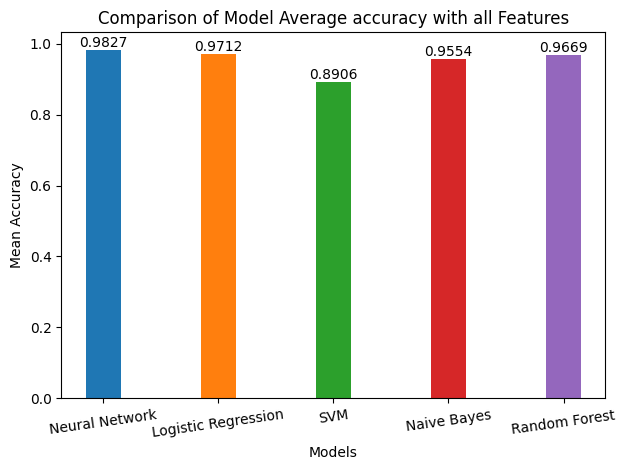

In [ ]:
import matplotlib.pyplot as plt


# model names
models = ['Neural Network','Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
# Corresponding mean accuracy values
means1=[]
for i in range(5):
    means1 += [allModelAccResult[i]]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#  box plot

bar_width = 0.3 # adjust the width of the bars
plt.bar(models, means1, color=colors, width=bar_width)
# adding the title and labels
plt.title('Comparison of Model Average accuracy with all Features')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')

for i, mean in enumerate(means1):
    plt.text(i, mean, f'{mean:.4f}', ha='center', va='bottom')



plt.xticks(rotation=8, fontsize=10)  # x labels
plt.yticks(fontsize=10)



# show the plot
plt.tight_layout()
plt.show()


***Comparism of Machine Learning Model with Chi-Square Feature Selection***

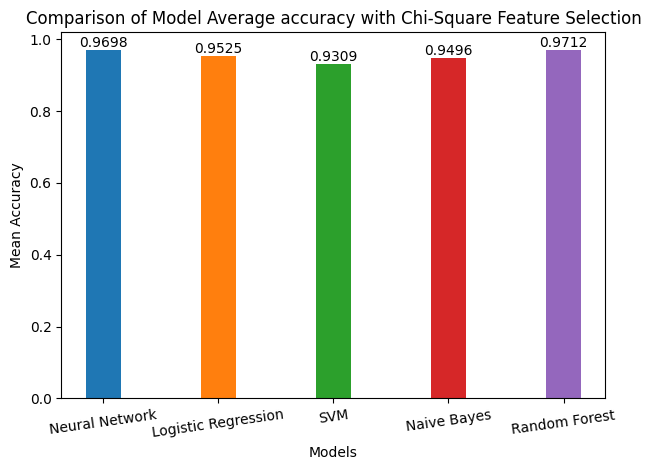

In [ ]:
import matplotlib.pyplot as plt


# model names
models = ['Neural Network','Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
# Corresponding mean accuracy values
means2=[]
for i in range(5, 10):
    means2 += [allModelAccResult[i]]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#  box plot

bar_width = 0.3 # adjust the width of the bars
plt.bar(models, means2, color=colors, width=bar_width)
# adding the title and labels
plt.title('Comparison of Model Average accuracy with Chi-Square Feature Selection')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')

for i, mean in enumerate(means2):
    plt.text(i, mean, f'{mean:.4f}', ha='center', va='bottom')



plt.xticks(rotation=8, fontsize=10)  # x labels
plt.yticks(fontsize=10)



# show the plot
plt.tight_layout()
plt.show()


***Comparism of Machine Learning Model with Mutal-Information Feature Selection***

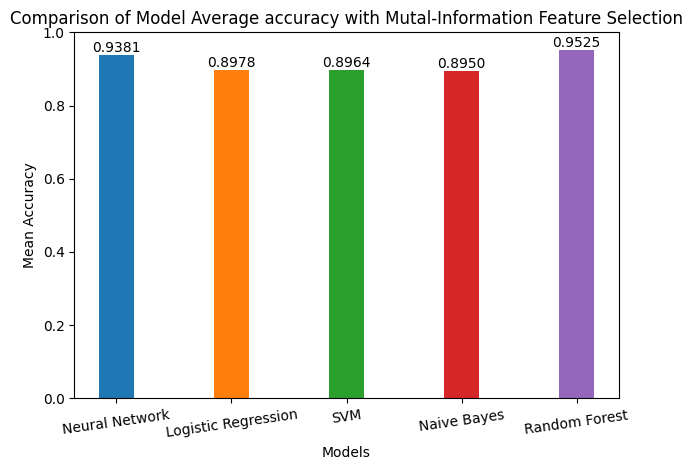

In [ ]:
import matplotlib.pyplot as plt


# model names
models = ['Neural Network','Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
# Corresponding mean accuracy values
means3 = []
for i in range(10, 15):
    means3 += [allModelAccResult[i]]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#  box plot

plt.bar(models, means3, color=colors, width=bar_width)
# adding the title and labels
plt.title('Comparison of Model Average accuracy with Mutal-Information Feature Selection')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')

for i, mean in enumerate(means3):
    plt.text(i, mean, f'{mean:.4f}', ha='center', va='bottom')



plt.xticks(rotation=8, fontsize=10)  # x labels
plt.yticks(fontsize=10)



# show the plot
plt.tight_layout()
plt.show()

Overall Model Feature Selection Comparism

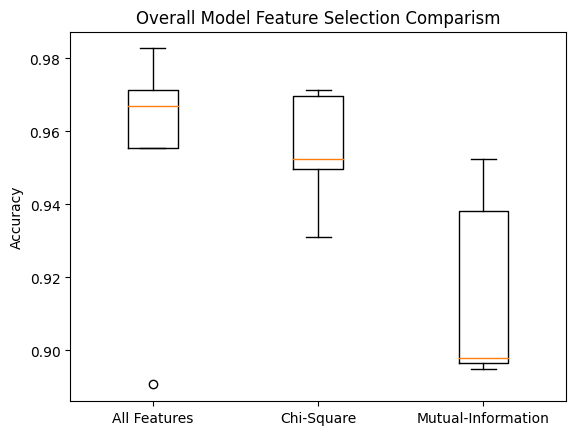

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is a list of lists containing the data for each algorithm
data = [means1, means2, means3]

labels = ['All Features', 'Chi-Square', 'Mutual-Information']

plt.boxplot(data, labels = labels)


plt.ylabel('Accuracy')
plt.title('Overall Model Feature Selection Comparism')
plt.show()



***Overall Model Accuracy Comparism***

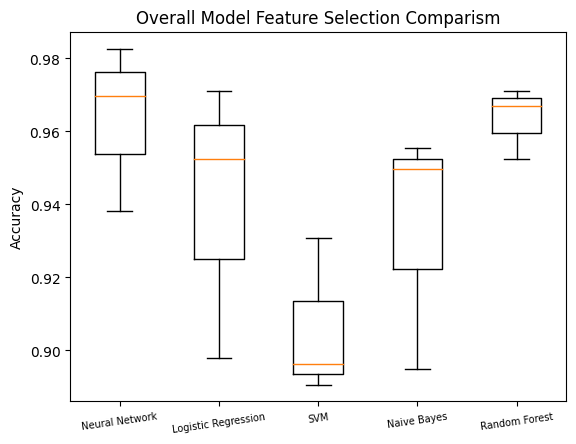

In [ ]:
# Initialize the list to hold labels and their related values






results = []



# Loop through 5 models accuracy
for i in range(5):
    # Calculate the related values
    related_values = [allModelAccResult[index] for index in [i, i + 5, i + 10] if index < len(allModelAccResult)]
    # Use extend to add each related value as a separate element
    results.extend(related_values)


data = [[results[0],results[1], results[2]],[results[3],results[4], results[5]],[results[6],results[7], results[8]],[results[9],results[10], results[11]],[results[12],results[13], results[14]]]

labels = ['Neural Network','Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']

plt.boxplot(data, labels = labels)

plt.xticks(rotation=8, fontsize=7)  # x labels
plt.ylabel('Accuracy')
plt.title('Overall Model Feature Selection Comparism')
plt.show()
